In dit programma :
-inlezen
-horizontaal flippen
-vertikaal flippen
-horizontaal + vertikaal flippen
-kleuren r g b
-kleuren r g b met wit
-vergroten

In [1]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
os.getcwd()

'C:\\Users\\BE76820\\OneDrive - AGC\\Documents\\numpy_image_processing\\Notebooks'

In [3]:
os.path.dirname(os.getcwd())

'C:\\Users\\BE76820\\OneDrive - AGC\\Documents\\numpy_image_processing'

In [4]:
foto1 = Image.open(os.path.join(os.path.dirname(os.getcwd()),'data\input\python.jpg'))

In [5]:
foto1.show()

In [6]:
print(foto1.height, foto1.width)

148 148


In [5]:
#functie om beeld om te zetten naar matrix 
def imagetomatrix (file) :
    image = Image.open(file)
    imagematrix = np.asarray(image)
    return imagematrix   


(148, 148, 3)


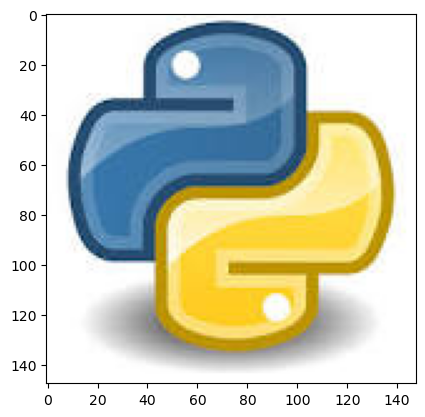

In [6]:
im_pylogo = imagetomatrix("python.jpg") 
print(im_pylogo.shape)
plt.imshow(im_pylogo)


In [7]:
#functie om (image)matrix horizontaal te spiegelen 
def fliphor (matrix) :
    r = matrix.shape[0]
    k = matrix.shape[1]
    #print(r,k)
    matrix_fliphor = np.zeros(shape = (r,k,3), dtype=np.int32)
    for i in range(r) :
        for j in range(k) :
            matrix_fliphor[i,j] = matrix[i,(r-1-j)%r]        
    return matrix_fliphor

#functie om (image)matrix vertikaal te spiegelen 
def flipver (matrix) :
    r = matrix.shape[0]
    k = matrix.shape[1]
    #print(r,k)
    matrix_flipver = np.zeros(shape = (r,k,3), dtype=np.int32)
    for i in range(r) :
        for j in range(k) :
            matrix_flipver[i,j] = matrix[(k-1-i)%k,j]  
    return matrix_flipver

#functie om (image)matrix horizontaal en vertikaal te spiegelen 
def fliphorver (matrix) :
    r = matrix.shape[0]
    k = matrix.shape[1]
    #print(r,k)
    matrix_fliphorver = np.zeros(shape = (r,k,3), dtype=np.int32)
    matrix_fliphorver = flipver(fliphor(matrix))
    return matrix_fliphorver


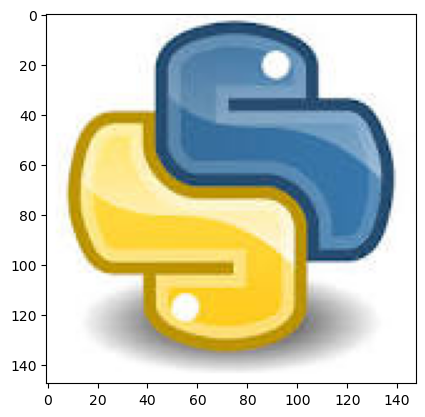

In [8]:
im_pylogo_h = fliphor (im_pylogo)
plt.imshow(im_pylogo_h)

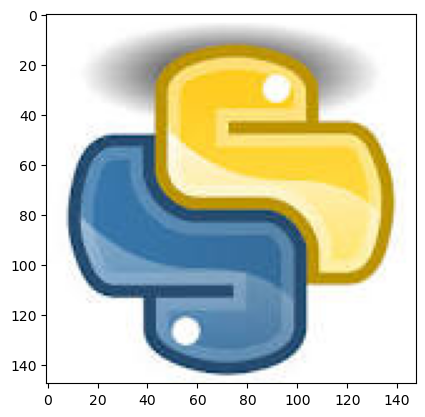

In [9]:
im_pylogo_v = flipver (im_pylogo)
plt.imshow(im_pylogo_v)

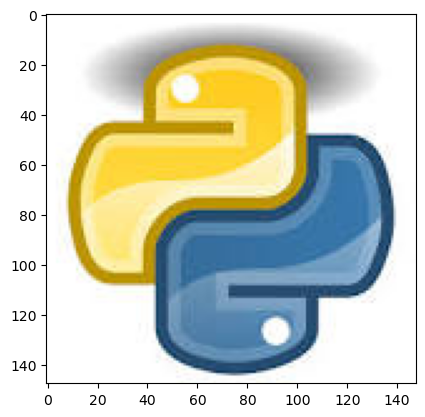

In [10]:
im_pylogo_hv = fliphorver (im_pylogo)
plt.imshow(im_pylogo_hv)

In [11]:
#functie om 1 kleur van imagematric (rgb) te bewaren 
def keepcolor (matrix,color) :
    matrix_color = matrix.copy()
    if color == 0 : #keep red postitie 0:
        matrix_color[:,:,[1,2]] = 0
    elif color == 1 : #keep green postitie 1:
        matrix_color[:,:,[0,2]] = 0
    elif color == 2 : #keep blue postitie 2:
        matrix_color[:,:,[0,1]] = 0
    return matrix_color


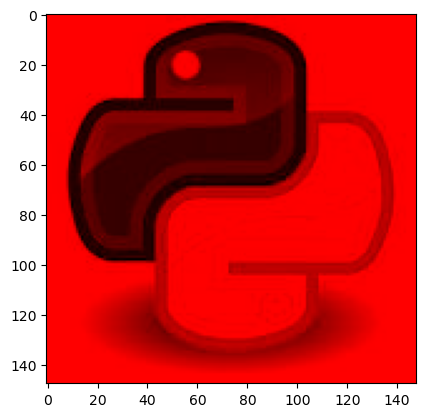

In [12]:
im_pylogo_red = keepcolor (im_pylogo,0)
plt.imshow(im_pylogo_red)

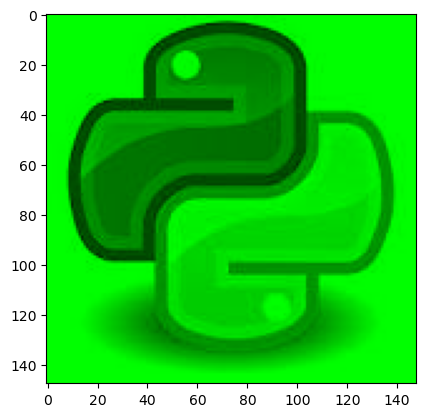

In [13]:
im_pylogo_green = keepcolor (im_pylogo,1)
plt.imshow(im_pylogo_green)

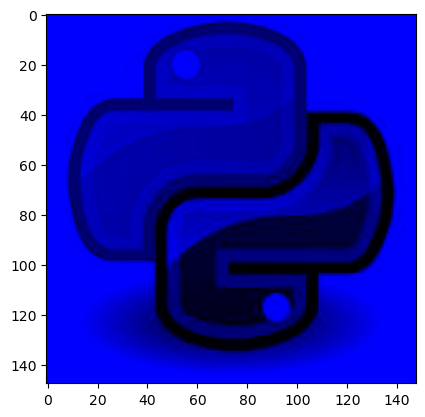

In [14]:
im_pylogo_blue = keepcolor (im_pylogo,2)
plt.imshow(im_pylogo_blue)

In [15]:
#functie om white (255,255,255) + 1 kleur van imagematric (rgb) te bewaren 
def keepcolor_w (matrix,color) :
    matrix_color = matrix.copy()
    for i in range(matrix.shape[0]) :
        for j in range(matrix.shape[1]) :
            if not (matrix_color[i,j,0] == 255 and matrix_color[i,j,1] == 255 and matrix_color[i,j,2] == 255) :
                if color == 0 : #keep red postitie 0:
                    matrix_color[i,j,[1,2]] = 0
                elif color == 1 : #keep green postitie 1:
                    matrix_color[i,j,[0,2]] = 0
                elif color == 2 : #keep blue postitie 2:
                    matrix_color[i,j,[0,1]] = 0
    return matrix_color


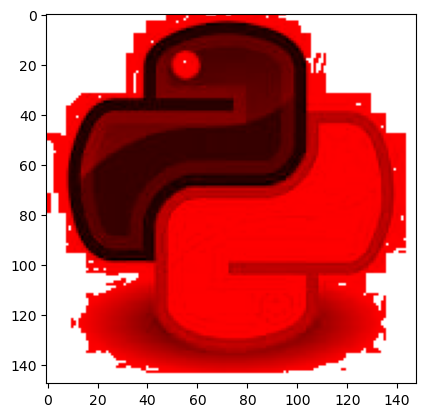

In [16]:
im_pylogo_redw = keepcolor_w (im_pylogo,0)
plt.imshow(im_pylogo_redw)

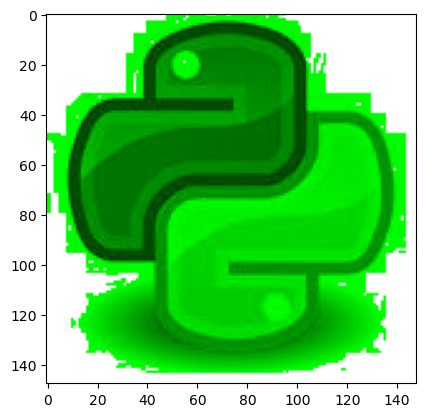

In [17]:
im_pylogo_greenw = keepcolor_w (im_pylogo,1)
plt.imshow(im_pylogo_greenw)

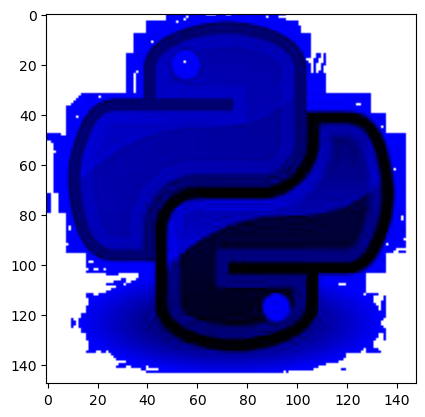

In [18]:
im_pylogo_bluew = keepcolor_w (im_pylogo,2)
plt.imshow(im_pylogo_bluew)

In [19]:
#functie om (image)matrix een factor te vergroten 
def larger (matrix,f) :
    r = matrix.shape[0]
    k = matrix.shape[1]
    matrix_larger = np.zeros(shape = (r*f,k*f,3), dtype=np.int32)
    for i in range(matrix_larger.shape[0]) :
        for j in range(matrix_larger.shape[1]) :
            matrix_larger[i,j] = matrix[i//f,j//f]
    return matrix_larger


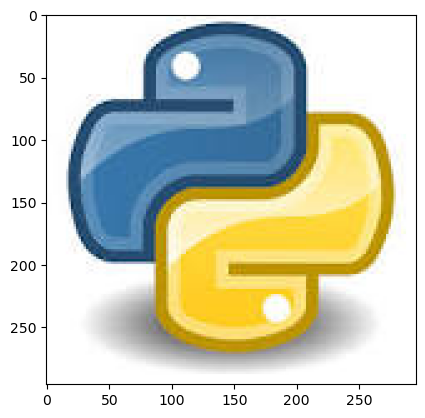

In [20]:
im_pylogo_f2 = larger (im_pylogo,2)
plt.imshow(im_pylogo_f2)


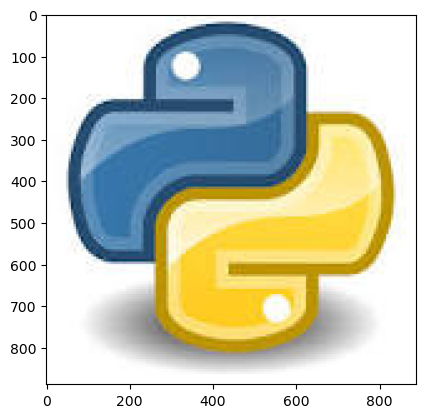

In [21]:
im_pylogo_f6 = larger (im_pylogo,6)
plt.imshow(im_pylogo_f6)
